# <center>Airbnb Listings Bangkok Neighbourhoods alongside Chao Praya River or NOT</center>
---
<center> Muhammad Difagama Ivanka </center>

# 1. Background of the Problem & The Goals

Bangkok's Chao Phraya River is a major center of the city's development process. Starting from the transportation aspect, the division of several areas, to the residences in the range of its edge. AirBnB as one of the online marketplaces for lodging is one that has a number of listings in Bangkok. As AirBnB, of course, wants an increase in the number of existing listings to be at least 5% more than the previous year. In order to get a more in-depth analysis process and where the potential lies, a comparison process of listings on the banks of the chao phraya river with those that are not (other than) is carried out. Later it will be seen with the position of strategies to several landmarks from tourism, as well as public places (eg transportation), around the chao phraya river whether it has a number of interesting facts if the comparison is made. The end result will show the need for additional listing in which area.

# 2. Data Preview

[<small>Source Dataset of AirBnB Listings Bangkok</small>](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF)

Data Dictionary
<small>
| # | Features | Description |
| --- | --- | --- |
| 1 | id | Airbnb's unique identifier for the listing |
| 2 | name | Name of the listing |
| 3 | host_id | Airbnb's unique identifier for the host/user |
| 4 | host_name | Name of the host. Usually, just the first name(s). |
| 5 | neighborhood | The neighborhood is geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles |
| 6 | latitude | A measurement of location north or south of the Equator, and is approximately the angle between the equatorial plane and the normal from the ground at that location. Lines of latitude run parallel to the Equator. Uses the World Geodetic System (WGS84) projection for latitude, based on an oblate spheroid earth shape and a reference meridian that is slightly east of the Greenwich meridian. WGS84 coordinates are usually expressed in decimal degrees, with north and east positive. |
| 7 | longitude | Similar measurement as Latitude but on east or west of the Greenwich meridian. Lines of longitude run from the top of the Earth to the bottom. Uses the World Geodetic System (WGS84) projection for longitude, based on an oblate spheroid earth shape and a reference meridian that is slightly east of the Greenwich meridian. WGS84 coordinates are usually expressed in decimal degrees, with north and east positive. |
| 8 | room_type | [Entire home/apt, Private room , Shared room, Hotel] <br> <br> 1. Entire place: The best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance. Hosts should note in the description if they'll be on the property or not (ex: "Host occupies the first floor of the home") and provide further details on the listing. <br> 2. Private rooms: Great for when you prefer a little privacy, and still value a local connection. When you book a private room, you'll have your private room for sleeping and may share some spaces with others. You might need to walk through indoor spaces that another host or guest may occupy to get to your room. <br> 3. Shared rooms: For when you don't mind sharing a space with others. When you book a shared room, you'll be sleeping in a space that is shared with others and share the entire space with other people. Shared rooms are popular among flexible travelers looking for new friends and budget-friendly stays. <br> 4. Hotel rooms: This is a private room in a hotel or similar establishment |
| 9 | price | Daily price in local currency (baht). Note, the $ sign may be used despite the locale |
| 10 | minimum_nights | The minimum number of night stays for the listing (calendar rules may differ) |
| 11 | number_of_reviews | The number of reviews the listing has |
| 12 | last_review | The date of the last/newest review |
| 13 | calculated_host_listings_count | The number of listings the host has in the current scrape in the city/region geography |
| 14 | availability_365 | The calendar determines the availability of the listing x days in the future. Note a listing may be available because it has been booked by a guest or blocked by the host, for example 365, so it means the listing available for 1 year |
| 15 | number_of_reviews_ltm | The number of reviews the listing has (in the last 12 months) |

</small>

In [731]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geodatasets import get_path
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
from matplotlib.lines import Line2D

plt.style.use('ggplot')
sns.set_style('darkgrid', {'grid.background': 'blue'})

# Fixing random state for reproducibility
np.random.seed(123)

In [924]:
# Open and Show the AirBnB data as Pandas Dataframe, remove unnecessary feature (unnamed: 0)

airbnb = pd.read_csv('Airbnb Listings Bangkok.csv').iloc[:, 1:]
airbnb.head(7)

id                                            name  host_id  \
0    27934                 Nice room with superb city view   120437   
1    27979                  Easy going landlord,easy place   120541   
2    28745               modern-style apartment in Bangkok   123784   
3    35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   
4   941865                      Suite Room 3 at MetroPoint   610315   
5  1704776                  NEw Pro!!  Bungalow Bkk Centre  2129668   
6    48736                 Condo with Chaopraya River View   222005   

    host_name  neighbourhood  latitude  longitude        room_type  price  \
0      Nuttee    Ratchathewi  13.75983  100.54134  Entire home/apt   1905   
1         Emy        Bang Na  13.66818  100.61674     Private room   1316   
2  Familyroom      Bang Kapi  13.75232  100.62402     Private room    800   
3     Sirilak      Din Daeng  13.78823  100.57256     Private room   1286   
4       Kasem      Bang Kapi  13.76872  100.63338     Private room   1905   
5    Wimonpak  Bang Kho laen  13.69757  100.52880  Entire home/apt   1000   
6    Athitaya     Rat Burana  13.68556  100.49535     Private room   1558   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               3                 65  2020-01-06               0.50   
1               1                  0         NaN                NaN   
2              60                  0         NaN                NaN   
3               7                  2  2022-04-01               0.03   
4               1                  0         NaN                NaN   
5             250                 19  2017-08-03               0.17   
6               3                  1  2014-02-03               0.01   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0  
5                              41               365                      0  
6                               1               365                      0

## General Information

In [733]:
# Number of rows and features

print(f'AirBnB Rows Count\t\t: {len(airbnb)} rows')
print(f'AirBnB Features Count\t\t: {len(airbnb.columns)} features')
print(f'Number of Listing Unique IDs\'\t: {airbnb.id.nunique()}')

AirBnB Rows Count		: 15854 rows
AirBnB Features Count		: 16 features
Number of Listing Unique IDs'	: 15854


In [734]:
# General info for the AirBnB's Dataframe (datatype of each feature, total feature count without null values, etc)

airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

## Descriptive Statistics

In [735]:
# Descriptive Statistics Summary for Numerical Features (exclude id features, because it more of nominal/categorical)

airbnb.iloc[:, 3:].describe().T

count         mean           std        min  \
latitude                        15854.0    13.745144      0.043040   13.52730   
longitude                       15854.0   100.559903      0.050911  100.32955   
price                           15854.0  3217.703923  24972.122358    0.00000   
minimum_nights                  15854.0    15.292355     50.815020    1.00000   
number_of_reviews               15854.0    16.654157     40.613331    0.00000   
reviews_per_month               10064.0     0.813145      1.090196    0.01000   
calculated_host_listings_count  15854.0    13.889618     30.269848    1.00000   
availability_365                15854.0   244.378643    125.843224    0.00000   
number_of_reviews_ltm           15854.0     3.481519      8.916937    0.00000   

                                      25%          50%          75%  \
latitude                         13.72009    13.738490    13.759497   
longitude                       100.52969   100.561415   100.585150   
price                           900.00000  1429.000000  2429.000000   
minimum_nights                    1.00000     1.000000     7.000000   
number_of_reviews                 0.00000     2.000000    13.000000   
reviews_per_month                 0.12000     0.435000     1.060000   
calculated_host_listings_count    1.00000     4.000000    13.000000   
availability_365                138.00000   309.000000   360.000000   
number_of_reviews_ltm             0.00000     0.000000     3.000000   

                                         max  
latitude                        1.395354e+01  
longitude                       1.009234e+02  
price                           1.100000e+06  
minimum_nights                  1.125000e+03  
number_of_reviews               1.224000e+03  
reviews_per_month               1.913000e+01  
calculated_host_listings_count  2.280000e+02  
availability_365                3.650000e+02  
number_of_reviews_ltm           3.250000e+02

In [736]:
# Descriptive Statistics Summary for Categorical Features (host_id the same as host_name)

airbnb.describe(include='O').T

count unique                                               top  \
name           15846  14794  New!  La Chada Night Market studio 2PPL near MRT   
host_name      15853   5312                                             Curry   
neighbourhood  15854     50                                           Vadhana   
room_type      15854      4                                   Entire home/apt   
last_review    10064   1669                                        2022-12-11   

               freq  
name             45  
host_name       228  
neighbourhood  2153  
room_type      8912  
last_review     189

In [737]:
# column list

airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

## Possible Outliers

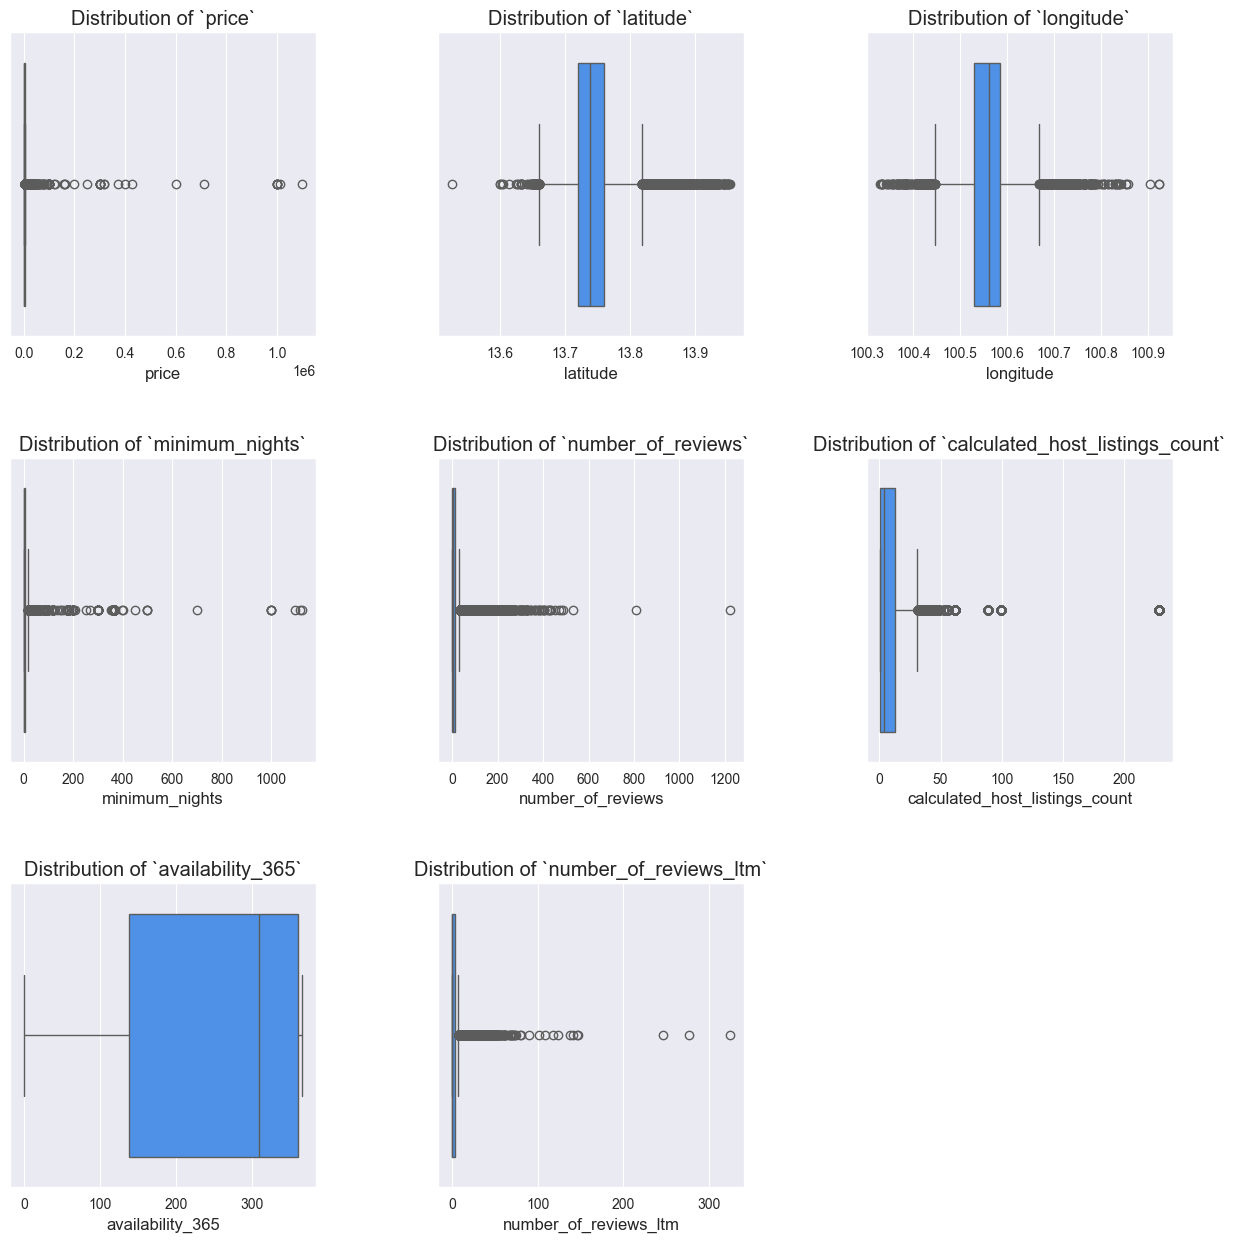

In [926]:
# Potential Outliers on Numerical Features
# Setting up the figure and axes
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# List of features to plot
numerical_feats = [
    'price',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'calculated_host_listings_count',
    'availability_365',
    'number_of_reviews_ltm'
    ]

# Plotting each feature in the respective subplot
for ax, feature in zip(axes.flatten(), numerical_feats):
    if feature == 'room_type':
        sns.boxplot(x=airbnb[feature], y=airbnb['price'], ax=ax)
        ax.set_title(f'Price by {feature}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    else:
        sns.boxplot(x=airbnb[feature], ax=ax, orient='horizontal', color='#358EFF')
        ax.set_title(f'Distribution of `{feature}`')

# Removing any unused subplots (if any)
for i in range(len(numerical_feats), 9):
    fig.delaxes(axes.flatten()[i])

plt.show()

Based on this charts, several features really right-skewed + contains possible outliers (price, minimum_nights, number_of_reviews, calculated_host_listings_count, number_of_reviews_ltm), one feature look left-skewed without possible outliers point detected (availability_365), and for latitude, longitude almost not skewed + also contains possible outliers (but possibly will be left as it because only needed for geo-location).

In [744]:
# Outliers Candidate percentage

outliers_candidate = dict()

def outliers_check(df, feature_name):
    Q3 = df[feature_name].quantile(.75)
    Q1 = df[feature_name].quantile(.25)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    outliers_df = df[(df[feature_name] > upper_bound) | (df[feature_name] < lower_bound)]
    return outliers_df

for k in numerical_feats:
    outliers_df = outliers_check(airbnb, k)
    outliers_candidate[k] = len(outliers_df)

outliers_candidate_df = pd.DataFrame(outliers_candidate, index=['-']).T.reset_index()
outliers_candidate_df.columns = ['Features', 'Outliers Count']
outliers_candidate_df['Outliers Percentage'] = round(outliers_candidate_df['Outliers Count'] / len(airbnb) * 100, 3)
outliers_candidate_df.sort_values(by='Outliers Percentage', ascending=False, ignore_index=True)

Features  Outliers Count  Outliers Percentage
0                  minimum_nights            3168               19.982
1               number_of_reviews            2240               14.129
2           number_of_reviews_ltm            2219               13.996
3  calculated_host_listings_count            1832               11.555
4                           price            1403                8.850
5                        latitude            1095                6.907
6                       longitude             602                3.797
7                availability_365               0                0.000

In [745]:
# Outliers Candidate percentage

outliers_candidate2 = dict()

def outliers_check(df, feature_name):
    Q3 = df[feature_name].quantile(.75)
    Q1 = df[feature_name].quantile(.25)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    outliers_df = df[(df[feature_name] > upper_bound) | (df[feature_name] < lower_bound)]
    return outliers_df

for k in numerical_feats:
    outliers2_df = outliers_check(no_out, k)
    outliers_candidate2[k] = len(outliers2_df)

outliers_candidate2_df = pd.DataFrame(outliers_candidate2, index=['-']).T.reset_index()
outliers_candidate2_df.columns = ['Features', 'Outliers Count']
outliers_candidate2_df['Outliers Percentage'] = round(outliers_candidate2_df['Outliers Count'] / len(no_out) * 100, 3)
outliers_candidate2_df.sort_values(by='Outliers Percentage', ascending=False, ignore_index=True)

Features  Outliers Count  Outliers Percentage
0                  minimum_nights            2006               23.670
1           number_of_reviews_ltm            1152               13.593
2  calculated_host_listings_count            1020               12.035
3               number_of_reviews             937               11.056
4                        latitude             575                6.785
5                       longitude             382                4.507
6                           price             287                3.386
7                availability_365               0                0.000

In [746]:
# outliers_check(airbnb, 'price')

In [ ]:
price_out = outliers_check(airbnb, 'price')
price_cl = airbnb.drop(price_out.index)

night_out = outliers_check(price_cl, 'minimum_nights')
night_cl = price_cl.drop(night_out.index)

rev_cnt = outliers_check(night_cl, 'number_of_reviews')
rev_cl = night_cl.drop(rev_cnt.index)

revltm_out = outliers_check(rev_cl, 'minimum_nights')

no_out = rev_cl.drop(revltm_out.index)

# 3. Data Cleansing

## Missing Values Imputation

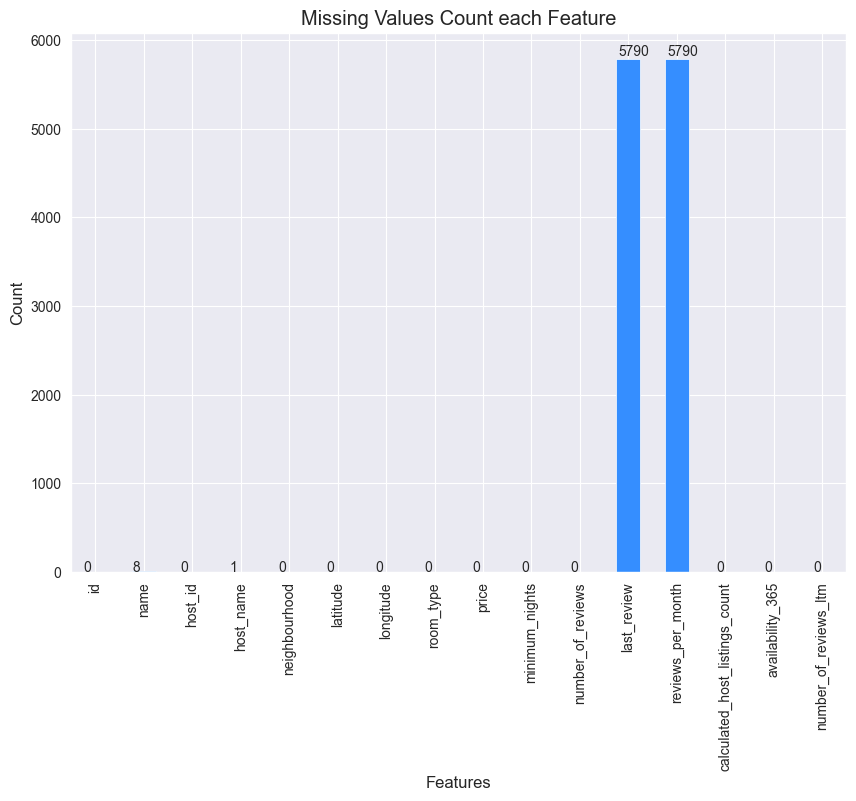

In [968]:
# NA or NULL values count

ax = airbnb.isna().sum().plot.bar(
    figsize = (10, 7),
    title = 'Missing Values Count each Feature',
    xlabel = 'Features',
    ylabel = 'Count',
    color = '#358EFF'
)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005));

In [969]:
# Percentage of missing values

missing_cnt = airbnb.isna().sum()
missing_cols = airbnb.columns[missing_cnt > 0]

missing_df = pd.DataFrame(airbnb[missing_cols].isna().sum())
missing_df['missing_percentage'] = airbnb[missing_cols].isna().sum().values / airbnb.shape[0] * 100
missing_df.columns = ['missing_count', 'missing_percentage']
missing_df = missing_df.sort_values(by='missing_count', ascending=False)
missing_df

missing_count  missing_percentage
last_review                 5790           36.520752
reviews_per_month           5790           36.520752
name                           8            0.050460
host_name                      1            0.006308

In [747]:
# copy the original dataframe to other variable for this process

airbnb_cleaned = airbnb.copy()

In [748]:
# the one and only host_name missing value

airbnb_cleaned[airbnb_cleaned['host_name'].isna()]

id           name    host_id host_name neighbourhood  latitude  \
3571  19682464  Cozy Hideaway  137488762       NaN     Bang Kapi  13.76999   

      longitude     room_type  price  minimum_nights  number_of_reviews  \
3571  100.63769  Private room   1399               3                  1   

     last_review  reviews_per_month  calculated_host_listings_count  \
3571  2017-07-29               0.02                               1   

      availability_365  number_of_reviews_ltm  
3571               365                      0

In [749]:
# Listings without name

airbnb_cleaned[airbnb_cleaned['name'].isna()]

id name   host_id        host_name neighbourhood  latitude  \
439    4549768  NaN  18852579          Titawan  Phra Khanong  13.69406   
544    4720818  NaN  24386225           Cherry     Din Daeng  13.77562   
572    4245018  NaN  22030043        Parichart    Bang Phlat  13.78376   
669    6148415  NaN  31895202            Chira       Bang Na  13.68276   
1030   8055144  NaN  42521288          Nantida       Vadhana  13.74126   
1282  10000742  NaN  51374914  Diamond Bangkok   Ratchathewi  13.75328   
1594  10710165  NaN  55347997      Khaneungnit       Vadhana  13.71757   
2075  13142743  NaN  73275200         Pakaphol   Khlong Toei  13.72566   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
439   100.59619     Private room   1080               5                  0   
544   100.57346     Private room   1200               1                  0   
572   100.49821     Private room   1200               1                  0   
669   100.60894  Entire home/apt   2424               2                  0   
1030  100.55761     Private room   5000               3                  0   
1282  100.52928     Private room    930               1                  6   
1594  100.60464     Private room   1000               1                  0   
2075  100.56416     Private room    850               1                  2   

     last_review  reviews_per_month  calculated_host_listings_count  \
439          NaN                NaN                               1   
544          NaN                NaN                               1   
572          NaN                NaN                               1   
669          NaN                NaN                               1   
1030         NaN                NaN                               1   
1282  2017-05-13               0.07                               1   
1594         NaN                NaN                               1   
2075  2017-12-11               0.03                               3   

      availability_365  number_of_reviews_ltm  
439                365                      0  
544                365                      0  
572                365                      0  
669                365                      0  
1030               365                      0  
1282               365                      0  
1594               365                      0  
2075               220                      0

In [750]:
# last_review, host_name, name because we need to extract some valuable insight here
# as for reviews_per_month we will remove it this whole feature later

airbnb_cleaned['last_review'] = airbnb_cleaned['last_review'].fillna('Unknown')
airbnb_cleaned['host_name'] = airbnb_cleaned['host_name'].fillna(airbnb['host_id'].apply(lambda x: 'host_' + str(x)))
airbnb_cleaned['name'] = airbnb_cleaned['name'].fillna(airbnb['id'].apply(lambda x: 'name_' + str(x)))
airbnb_cleaned.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

## Duplicate Values Combined (especially the host name)

In [970]:
# Duplicate dataframe: the one that already keep 1 row (no orig) and the other which listed all the duplicates (with orig)
duplicate_df_no_orig = airbnb[
    airbnb.duplicated(subset=['name', 'host_id', 'neighbourhood', 'room_type', 'latitude', 'longitude'])
    ].sort_values(by=['name', 'host_id', 'reviews_per_month', 'host_name'])
duplicate_df_with_orig = airbnb[
    airbnb.duplicated(subset=['name', 'host_id', 'neighbourhood', 'room_type', 'latitude', 'longitude'], keep=False)
    ].sort_values(by=['name', 'host_id', 'reviews_per_month', 'host_name'])

print(
    'Duplicate Rows: ',
    len(duplicate_df_no_orig)
)

Duplicate Rows:  53


In [971]:
# Example of the same or updated host_name
airbnb[(airbnb.host_name == 'MeetU') | (airbnb.host_name == 'TTzahome')]

id                                               name  \
14805  749934710136320748   曼谷市中心酒店式公寓/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费   
14806  749967082827376832    曼谷市中心高端公寓/近BTS/游泳池/健身房,近BTS,免费高速WIFI,帕蓬夜市14分钟可达   
14954  756471239000772274  曼谷市中心loft公寓/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费   
14956  756483007547102415  曼谷市中心loft公寓/近BTS/游泳池/健身房,近BTS,免费高速WIFI,帕蓬夜市14分钟可达   
15056  761730987577311793  曼谷市中心loft公寓/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费   
15057  761732077403679711  曼谷市中心loft公寓/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费   
15457  776198445437677202  曼谷市中心酒店式公寓2/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费   
15715  785774132384918926    曼谷市中心高端公寓/近BTS/游泳池/健身房,近BTS,免费高速WIFI,帕蓬夜市14分钟可达   
15716  785780633989276627  曼谷市中心loft公寓/近BTS/游泳池/健身房,近BTS,免费高速WIFI,帕蓬夜市14分钟可达   
15717  785799200036904329  曼谷市中心loft公寓/近BTS/游泳池/健身房,近BTS,免费高速WIFI,帕蓬夜市14分钟可达   
15818  789868292624157017  曼谷市中心loft公寓/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费   

         host_id host_name neighbourhood   latitude   longitude  \
14805  227771817     MeetU        Sathon  13.711027  100.519891   
14806  219984842  TTzahome        Sathon  13.711027  100.519891   
14954  227771817     MeetU        Sathon  13.708740  100.519870   
14956  219984842  TTzahome        Sathon  13.711030  100.521810   
15056  227771817     MeetU        Sathon  13.710777  100.519891   
15057  227771817     MeetU        Sathon  13.710777  100.519891   
15457  227771817     MeetU        Sathon  13.708500  100.519600   
15715  219984842  TTzahome        Sathon  13.710777  100.519891   
15716  219984842  TTzahome        Sathon  13.710777  100.519891   
15717  219984842  TTzahome        Sathon  13.710777  100.519891   
15818  227771817     MeetU        Sathon  13.710777  100.519891   

             room_type  price  minimum_nights  number_of_reviews last_review  \
14805  Entire home/apt   1091               1                  1  2022-11-18   
14806  Entire home/apt   1120               1                  0         NaN   
14954  Entire home/apt   1348               1                  1  2022-11-11   
14956  Entire home/apt   1376               1                  0         NaN   
15056  Entire home/apt   1370               1                  0         NaN   
15057  Entire home/apt   1276               1                  1  2022-12-26   
15457  Entire home/apt   1156               1                  1  2022-12-14   
15715  Entire home/apt   1184               1                  0         NaN   
15716  Entire home/apt   1333               1                  0         NaN   
15717  Entire home/apt   1285               1                  0         NaN   
15818  Entire home/apt   1532               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
14805               0.73                               6               340   
14806                NaN                               5               340   
14954               0.63                               6               350   
14956                NaN                               5               355   
15056                NaN                               6               341   
15057               1.00                               6               342   
15457               1.00                               6               354   
15715                NaN                               5               354   
15716                NaN                               5               350   
15717                NaN                               5               342   
15818                NaN                               6               344   

       number_of_reviews_ltm  
14805                      1  
14806                      0  
14954                      1  
14956                      0  
15056                      0  
15057                      1  
15457                      1  
15715                      0  
15716                      0  
15717                      0  
15818             

In [751]:
# One sample based on several feature duplication

duplicate_df_with_orig[duplicate_df_with_orig.name=='15days!New!Bang Phlat MRT 600m/swiming pool/gym']

id                                             name  \
15140  767854746382894709  15days!New!Bang Phlat MRT 600m/swiming pool/gym   
15251  770020360658818433  15days!New!Bang Phlat MRT 600m/swiming pool/gym   
14479  737304241187219763  15days!New!Bang Phlat MRT 600m/swiming pool/gym   
14429  727179198031873152  15days!New!Bang Phlat MRT 600m/swiming pool/gym   

         host_id host_name neighbourhood   latitude  longitude  \
15140   52161947     Noons    Bang Phlat  13.788938   100.5036   
15251   52161947     Noons    Bang Phlat  13.788938   100.5036   
14479  201677068     Curry    Bang Phlat  13.788938   100.5036   
14429  201677068     Curry    Bang Phlat  13.788938   100.5036   

             room_type  price  minimum_nights  number_of_reviews last_review  \
15140  Entire home/apt    885              15                  0         NaN   
15251  Entire home/apt    708              15                  0         NaN   
14479  Entire home/apt    883              15                  1  2022-11-26   
14429  Entire home/apt    883              15                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
15140                NaN                              99               320   
15251                NaN                              99               323   
14479               0.91                             228               328   
14429                NaN                             228               253   

       number_of_reviews_ltm  
15140                      0  
15251                      0  
14479                      1  
14429                      0

In [752]:
# first will get the newest based on the id, last will get the one with last_review value

combined_dups = duplicate_df_no_orig.groupby(['name', 'neighbourhood', 'room_type', 'latitude', 'longitude']).agg({
    'id': 'last',
    'name': 'last',
    'host_id': 'last',
    'host_name': 'last',
    'neighbourhood': 'last',
    'latitude': 'last',
    'longitude': 'last',
    'room_type': 'last',
    'price': 'first',
    'minimum_nights': 'last',
    'number_of_reviews': 'last',
    'last_review': 'first',
    'reviews_per_month':'first',
    'calculated_host_listings_count': 'last',
    'availability_365': 'last',
    'number_of_reviews_ltm': 'last'
}).reset_index(drop=True)

combined_dups['last_review'] = combined_dups['last_review'].fillna('Unknown')
combined_dups

id                                               name  \
0   737304241187219763    15days!New!Bang Phlat MRT 600m/swiming pool/gym   
1   787296571117687159        2 Beds Thong lor/Ekkamai/Nana/Swimming pool   
2   711118986202155661  30days! Sukhumvit NANA spacious 2BR 4PPL near BTS   
3   767061827877321023  50m MRT, Big C, 1 BR condo with Sauna, Pool & Gym   
4   789484901156712444  50m MRT, Big C, 1 BR condo with Sauna, Pool & Gym   
5   746661477647888634             Budget Hotel in Center of Bangkok @HAP   
6             33558863  Cozy Room/Private/(2pp)/BTS7Min/Silom/Sathorn/New   
7             37802487            DOUBLE AIRPORT 10MIN, NICE VIEW ROOFTOP   
8             30979633     Family Friendly Condo with Baby amenities提供婴儿床   
9   790280473547745220                           Family Room for 4 People   
10            38329844  Great price, 100m Short walk to BTS, Why stay ...   
11  781514912980696908    Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   
12  780896408611028752    Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   
13            22351252      Luxury Room near BTS Bangchak with Pool & Gym   
14            28907857                          NA BANGLAMPOO GUEST HOUSE   
15  727363160560898407  New spacious 2BR 3PPL with pool&gym Silom &Sat...   
16  775760348801426466  New! Gateway/ Bangkok University 1BR 2PPL near...   
17  719888195728578949  New! Gateway/ Bangkok University 1BR 2PPL near...   
18            30897743  ONLY 10 min walk BTS Ari / BAANNUENG @ari5[Suite]   
19  777296851892558815  One Siam/Platinum Fashion Mall/Mrt Arl Bts/MBK...   
20  752492939552768989         Private Room in Sukhumvit: BTS Phrom Phong   
21  726512577261594963   Sale! BTS On Nut/Sukhumvit 87/loft/pool/gym/wifi   
22  765721954905526928            Sathon Luxury 2 br/China Town/Icon Siam   
23  767128654727724698            Sathon Luxury Loft/China Town/Icon Siam   
24            32858411                                    Silvio's Bistro   
25            19000129               Studio for 2PAX: 1-Min from BTS Nana   
26            21045066    Studio with Zen garden view (30sqm), LUXX Silom   
27             7717620   Sukhumvit, 5 min walk to Sky Train Asoke Station   
28  714772335263168818                                Thaya Hotel Bangkok   
29            31364839                                 The Lux Ladprao 10   
30            30891463                                 The Lux Ladpraw 10   
31            37572967             Vintage LOFT SUITE in Bangkok old town   
32            35863482     White House Hostel Deluxe Room Shared Bathroom   
33            37954129                                             small1   
34  785799200036904329  曼谷市中心loft公寓/近BTS/游泳池/健身房,近BTS,免费高速WIFI,帕蓬夜市14分钟可达   
35  789868292624157017  曼谷市中心loft公寓/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费   

      host_id                   host_name neighbourhood   latitude  \
0   201677068                       Curry    Bang Phlat  13.788938   
1   485413319                        Yang   Khlong Toei  13.722669   
2   201677068                       Curry   Ratchathewi  13.750300   
3   472715937                   Kotcharat      Bang Sue  13.828505   
4   472715937                   Kotcharat      Bang Sue  13.828505   
5   476157531                      Tachin        Sathon  13.720197   
6    60049967                        Note      Bang Rak  13.723330   
7   273701410                      Jirayu   Lat Krabang  13.719430   
8    12464021                     Rebecca   Huai Khwang  13.760440   
9   340188343                      Rachan       Vadhana  13.740168   
10   95548084                  Mod Apiluk   Parthum Wan  13.743800   
11   20133201                      Willam   Huai Khwang  13.756184   
12  344327171                       Alice   Huai Khwang  13.757097   
13    8444643                   Kiattisak  Phra Khanong  13.698500   
14   87704107                         Yui   Phra Nakhon  13.762790   
15  480415786                       Aaron      Ban

In [753]:
dup_test = airbnb.sort_values(by=['name', 'host_name', 'reviews_per_month']).\
    drop_duplicates(subset=['name', 'host_id', 'neighbourhood', 'room_type', 'latitude', 'longitude'], keep=False)

In [754]:
# Removing the original duplicates from the dataset and adding the combined rows based on its host before

airbnb_cleaned = pd.concat([airbnb_cleaned.drop(duplicate_df_with_orig.index), combined_dups], axis=0).reset_index(drop=True)
airbnb_cleaned

id                                               name  \
0                   27934                    Nice room with superb city view   
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
3                   35780     Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                         Suite Room 3 at MetroPoint   
...                   ...                                                ...   
15791            37572967             Vintage LOFT SUITE in Bangkok old town   
15792            35863482     White House Hostel Deluxe Room Shared Bathroom   
15793            37954129                                             small1   
15794  785799200036904329  曼谷市中心loft公寓/近BTS/游泳池/健身房,近BTS,免费高速WIFI,帕蓬夜市14分钟可达   
15795  789868292624157017  曼谷市中心loft公寓/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费   

         host_id   host_name neighbourhood   latitude   longitude  \
0         120437      Nuttee   Ratchathewi  13.759830  100.541340   
1         120541         Emy       Bang Na  13.668180  100.616740   
2         123784  Familyroom     Bang Kapi  13.752320  100.624020   
3         153730     Sirilak     Din Daeng  13.788230  100.572560   
4         610315       Kasem     Bang Kapi  13.768720  100.633380   
...          ...         ...           ...        ...         ...   
15791  214236911       Jason   Phra Nakhon  13.757000  100.504680   
15792  266898220        Piti   Ratchathewi  13.753400  100.538220   
15793   97598307         Soo    Don Mueang  13.920720  100.575780   
15794  219984842    TTzahome        Sathon  13.710777  100.519891   
15795  227771817       MeetU        Sathon  13.710777  100.519891   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1905               3                 65  2020-01-06   
1         Private room   1316               1                  0     Unknown   
2         Private room    800              60                  0     Unknown   
3         Private room   1286               7                  2  2022-04-01   
4         Private room   1905               1                  0     Unknown   
...                ...    ...             ...                ...         ...   
15791       Hotel room   4800               1                  0     Unknown   
15792       Hotel room    786               1                  8  2022-12-07   
15793      Shared room    350               1                  0     Unknown   
15794  Entire home/apt   1285               1                  0     Unknown   
15795  Entire home/apt   1276               1                  0  2022-12-26   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.50                               2               353   
1                    NaN                               2               358   
2                    NaN                               1               365   
3                   0.03                               1               323   
4                    NaN                               3               365   
...                  ...                             ...               ...   
15791                NaN                               6               310   
15792               0.19                              17               333   
15793                NaN                               4               180   
15794                NaN                               5               342   
15795               1.00                               6               344   

       number_of_reviews_ltm  
0                          0  
1                          0  
2                          0  
3                          1  
4                          0  
...                      ...  
15791                      0  
15792                      3  
15793                      0  
15794                    

## New Feature Creation (last review year)

In [755]:
airbnb_cleaned['last_review_year'] = airbnb_cleaned['last_review'].str.split('-').str[0]
airbnb_cleaned['last_review_year'] = np.where(airbnb_cleaned['last_review_year'].str == 'None', 'Unknown', airbnb_cleaned['last_review_year'])
airbnb_cleaned['last_review_year'].value_counts()

last_review_year
2022       6605
Unknown    5761
2020       1247
2019       1009
2018        484
2017        268
2021        206
2016        149
2015         50
2014          9
2013          7
2012          1
Name: count, dtype: int64

In [756]:
airbnb_cleaned.iloc[-35:]

id                                               name  \
15761  787296571117687159        2 Beds Thong lor/Ekkamai/Nana/Swimming pool   
15762  711118986202155661  30days! Sukhumvit NANA spacious 2BR 4PPL near BTS   
15763  767061827877321023  50m MRT, Big C, 1 BR condo with Sauna, Pool & Gym   
15764  789484901156712444  50m MRT, Big C, 1 BR condo with Sauna, Pool & Gym   
15765  746661477647888634             Budget Hotel in Center of Bangkok @HAP   
15766            33558863  Cozy Room/Private/(2pp)/BTS7Min/Silom/Sathorn/New   
15767            37802487            DOUBLE AIRPORT 10MIN, NICE VIEW ROOFTOP   
15768            30979633     Family Friendly Condo with Baby amenities提供婴儿床   
15769  790280473547745220                           Family Room for 4 People   
15770            38329844  Great price, 100m Short walk to BTS, Why stay ...   
15771  781514912980696908    Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   
15772  780896408611028752    Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   
15773            22351252      Luxury Room near BTS Bangchak with Pool & Gym   
15774            28907857                          NA BANGLAMPOO GUEST HOUSE   
15775  727363160560898407  New spacious 2BR 3PPL with pool&gym Silom &Sat...   
15776  775760348801426466  New! Gateway/ Bangkok University 1BR 2PPL near...   
15777  719888195728578949  New! Gateway/ Bangkok University 1BR 2PPL near...   
15778            30897743  ONLY 10 min walk BTS Ari / BAANNUENG @ari5[Suite]   
15779  777296851892558815  One Siam/Platinum Fashion Mall/Mrt Arl Bts/MBK...   
15780  752492939552768989         Private Room in Sukhumvit: BTS Phrom Phong   
15781  726512577261594963   Sale! BTS On Nut/Sukhumvit 87/loft/pool/gym/wifi   
15782  765721954905526928            Sathon Luxury 2 br/China Town/Icon Siam   
15783  767128654727724698            Sathon Luxury Loft/China Town/Icon Siam   
15784            32858411                                    Silvio's Bistro   
15785            19000129               Studio for 2PAX: 1-Min from BTS Nana   
15786            21045066    Studio with Zen garden view (30sqm), LUXX Silom   
15787             7717620   Sukhumvit, 5 min walk to Sky Train Asoke Station   
15788  714772335263168818                                Thaya Hotel Bangkok   
15789            31364839                                 The Lux Ladprao 10   
15790            30891463                                 The Lux Ladpraw 10   
15791            37572967             Vintage LOFT SUITE in Bangkok old town   
15792            35863482     White House Hostel Deluxe Room Shared Bathroom   
15793            37954129                                             small1   
15794  785799200036904329  曼谷市中心loft公寓/近BTS/游泳池/健身房,近BTS,免费高速WIFI,帕蓬夜市14分钟可达   
15795  789868292624157017  曼谷市中心loft公寓/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费   

         host_id                   host_name neighbourhood   latitude  \
15761  485413319                        Yang   Khlong Toei  13.722669   
15762  201677068                       Curry   Ratchathewi  13.750300   
15763  472715937                   Kotcharat      Bang Sue  13.828505   
15764  472715937                   Kotcharat      Bang Sue  13.828505   
15765  476157531                      Tachin        Sathon  13.720197   
15766   60049967                        Note      Bang Rak  13.723330   
15767  273701410                      Jirayu   Lat Krabang  13.719430   
15768   12464021                     Rebecca   Huai Khwang  13.760440   
15769  340188343                      Rachan       Vadhana  13.740168   
15770   95548084                  Mod Apiluk   Parthum Wan  13.743800   
15771   20133201                      Willam   Huai Khwang  13.756184   
15772  344327171                       Alice   Huai Khwang  13.757097   
15773    8444643                   Kiattisak  Phra Khanong  13.698500   
15774   87704107                         Yui   Phra Nakhon  13.762790   
15775  480415786                       Aaron   

In [757]:
last_rev_yr = airbnb_cleaned['last_review_year'].value_counts().sort_index()
last_rev_yr = last_rev_yr.drop('Unknown').reset_index()

# Calculate the growth percentage
last_rev_yr['growth_%_from_1_year_before'] = last_rev_yr['count'].pct_change() * 100

# Replace NaN values (resulting from pct_change) with 0%
last_rev_yr['growth_%_from_1_year_before'] = last_rev_yr['growth_%_from_1_year_before'].fillna(0)

last_rev_yr

last_review_year  count  growth_%_from_1_year_before
0              2012      1                     0.000000
1              2013      7                   600.000000
2              2014      9                    28.571429
3              2015     50                   455.555556
4              2016    149                   198.000000
5              2017    268                    79.865772
6              2018    484                    80.597015
7              2019   1009                   108.471074
8              2020   1247                    23.587711
9              2021    206                   -83.480353
10             2022   6605                  3106.310680

In [758]:
last_rev_yr['growth_%_from_1_year_before'].iloc[1:].mean()

459.74788826139803

In [759]:
last_rev_yr['count'].cumsum()

0         1
1         8
2        17
3        67
4       216
5       484
6       968
7      1977
8      3224
9      3430
10    10035
Name: count, dtype: int64

In [760]:
100 / len(airbnb) * 100

0.6307556452630251

## Remove Unneeded Features

In [761]:
# we do not need this feature, thus just remove it
airbnb_cleaned = airbnb_cleaned.drop(['reviews_per_month', 'last_review', 'number_of_reviews_ltm', 'availability_365'], axis=1)

In [762]:
airbnb_cleaned.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'last_review_year'],
      dtype='object')

## Capitalize Each First Word of Neighbourhood

In [936]:
airbnb[~(airbnb['neighbourhood'].str.istitle())]['neighbourhood'].unique()

array(['Bang Kho laen', 'Thon buri', 'Yan na wa', 'Thung khru',
       'Bang Khun thain'], dtype=object)

In [816]:
airbnb_cleaned['neighbourhood'] = airbnb_cleaned['neighbourhood'].str.title()
airbnb_cleaned['neighbourhood'] = airbnb_cleaned['neighbourhood'].apply(lambda x: 'Bang Kho Laem' if x == 'Bang Kho Laen' else x)
airbnb_cleaned['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho Laem', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Parthum Wan', 'Pra Wet',
       'Phra Nakhon', 'Thon Buri', 'Yan Na Wa', 'Suanluang', 'Don Mueang',
       'Dusit', 'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung Khru', 'Bang Khae',
       'Bang Khun Thain', 'Taling Chan', 'Bang Bon'], dtype=object)

## 10 Landmarks Geo-Position in Bangkok

In [763]:
landmarks_dict = {
    'The Grand Palace Bangkok': (13.750300, 100.491180),
    'Wat Arun Temple': (13.7438652, 100.4858691),
    'Bang Kachao': (13.6949882, 100.5559791),
    'King Power Mahanakhon Skywalk': (13.7235375, 100.5256718),
    'Jim Thompson House': (13.7492491,100.5257341),
    # 'Damnoen Saduak floating market': (13.5201684,99.9560295),
    'The National Museum of Bangkok': (13.7580779,100.4891328),
    'ICONSIAM shopping complex': (13.7264814,100.5073721),
    'Wat Phra Kaew': (13.7512917,100.4888557),
    'Royal Barges National Museum': (13.761947,100.4820195),
    'Sea Life Bangkok Ocean World': (13.746799,100.5337196)
}

landmarks_df = pd.DataFrame(landmarks_dict).T.reset_index()
landmarks_df.columns = ['Landmark Name', 'Latitude', 'Longitude']
landmarks_df

Landmark Name   Latitude   Longitude
0        The Grand Palace Bangkok  13.750300  100.491180
1                 Wat Arun Temple  13.743865  100.485869
2                     Bang Kachao  13.694988  100.555979
3   King Power Mahanakhon Skywalk  13.723538  100.525672
4              Jim Thompson House  13.749249  100.525734
5  The National Museum of Bangkok  13.758078  100.489133
6       ICONSIAM shopping complex  13.726481  100.507372
7                   Wat Phra Kaew  13.751292  100.488856
8    Royal Barges National Museum  13.761947  100.482020
9    Sea Life Bangkok Ocean World  13.746799  100.533720

## Chao Praya River (Neighbourhoods Alongside it)

![50districtsbangkokwiki.png](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Khet_Bangkok.svg/660px-Khet_Bangkok.svg.png)

image source: [wikipedia](https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok)

Neighbourhoods along Chao Phraya River:
1: Phra Nakhon
2: Dusit
4: Bang Rak
9: Phra Khanong
12: Yan Nawa
13: Samphanthawong
15: Thon Buri
16: Bangkok Yai
18: Khlong San
20: Bangkok Noi
24: Rat Burana
25: Bang Phlat
28: Sathon
29: Bang Sue
31: Bang Kho Laem
33: Khlong Toei
47: Bang Na

In [811]:
# List for neighbourhood that located alongside Chao Phraya river

neighbour_chao_phraya_list = (
    'Phra Nakhon',
    'Dusit',
    'Bang Rak',
    'Phra Khanong',
    'Yan Na Wa',
    'Samphanthawong',
    'Thon Buri',
    'Bangkok Yai',
    'Khlong San',
    'Bangkok Noi',
    'Rat Burana',
    'Bang Phlat',
    'Sathon',
    'Bang Sue',
    'Bang Kho Laem',
    'Khlong Toei',
    'Bang Na'
)

print(f'count of neighbourhoods alongside chao phraya river: {len(neighbour_chao_phraya_list)}')

count of neighbourhoods alongside chao phraya river: 17


In [817]:
# Give the information for neighbourhood location categorization

airbnb_cleaned['chao_phraya_pos'] = airbnb_cleaned['neighbourhood'].apply(
    lambda x: 'Alongside Chao Phraya River' if x in neighbour_chao_phraya_list else 'NOT Alongside'
)

airbnb_cleaned.head(1)

id                             name  host_id host_name neighbourhood  \
0  27934  Nice room with superb city view   120437    Nuttee   Ratchathewi   

   latitude  longitude        room_type  price  minimum_nights  \
0  13.75983  100.54134  Entire home/apt   1905               3   

   number_of_reviews  calculated_host_listings_count last_review_year  \
0                 65                               2             2020   

  chao_phraya_pos  
0   NOT Alongside

## Saved the Clean Data

In [918]:
airbnb_cleaned.to_csv('airbnb_listings_bangkok_clean.csv', index=False)

# 4. Exploratory Data Analysis (EDA)

## Proportion of Neighbourhoods alongside Chao Phraya River vs NOT

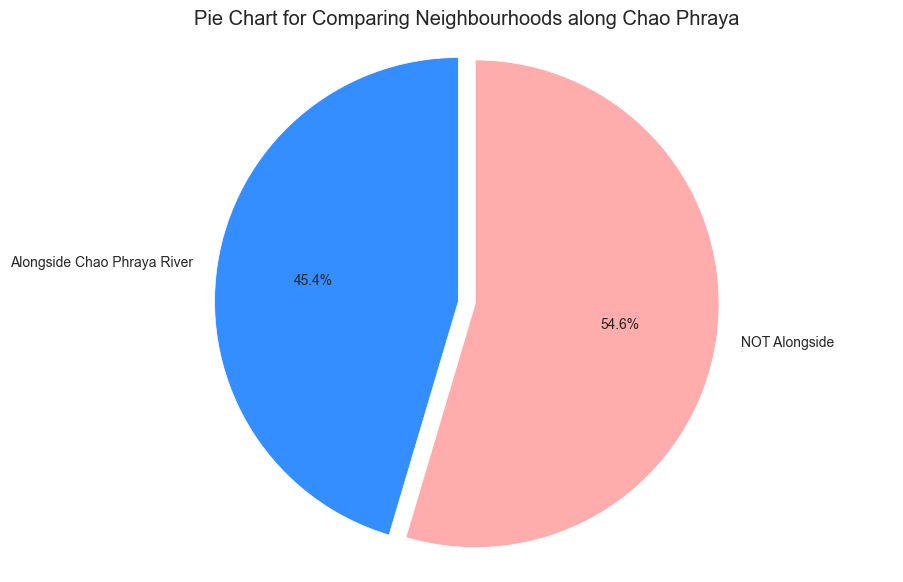

In [819]:
# Pie chart styling
chao_phraya_groupby = airbnb_cleaned['chao_phraya_pos'].value_counts().reset_index()

plt.figure(figsize=(11,7))
plt.title('Pie Chart for Comparing Neighbourhoods along Chao Phraya')
plt.pie(
    x=chao_phraya_groupby['count'],
    labels=chao_phraya_groupby['chao_phraya_pos'],
    autopct='%.1f%%',
    startangle=90,
    counterclock=False,
    explode=[.07, 0],
    colors= ['#FFACAC','#358EFF']
)
plt.axis('Equal');

Although neighbourhoods located alongside Chao Phraya river only about 34% of all neighbourhoods (17 out of 50), but the proportions say there are 45.4% listings located alongside Chao Phraya River!

## Map outlier vs non

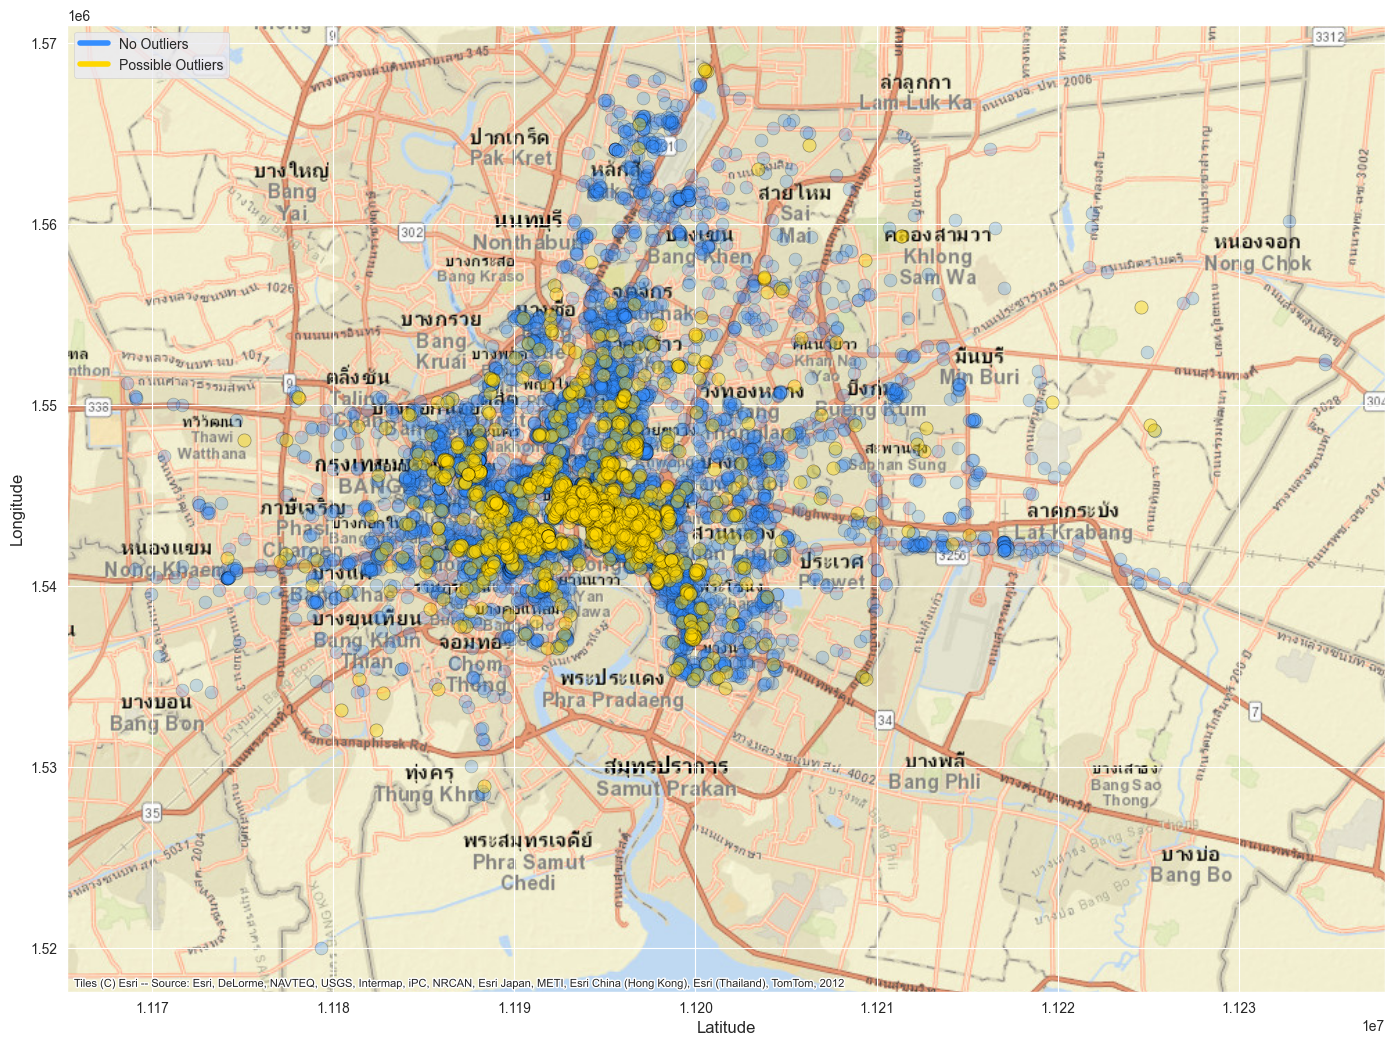

In [942]:
df_price_out = outliers_check(airbnb, 'price')

custom_lines = [Line2D([0], [0], color='#358EFF', lw=4),
                Line2D([0], [0], color='gold', lw=4)]

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(no_out['longitude'], no_out['latitude'])]
gdf = gpd.GeoDataFrame(no_out[['neighbourhood', 'latitude', 'longitude']], crs="EPSG:4326", geometry=geometry) # WGS 84 CRS

geo_out = [Point(xy) for xy in zip(df_price_out['longitude'], df_price_out['latitude'])]
gdf_out = gpd.GeoDataFrame(df_price_out[['neighbourhood', 'latitude', 'longitude']], crs="EPSG:4326", geometry=geo_out) # WGS 84 CRS

# Set CRS to EPSG:3857 for compatibility with contextily basemaps
gdf = gdf.to_crs(epsg=3857)

# Plot the base map with contextily
fig, ax = plt.subplots(figsize=(17, 13))
gdf.plot(ax=ax, color='#358EFF', markersize=85, alpha=0.25, edgecolor='k')

# # Set CRS to EPSG:3857 for compatibility with contextily basemaps
# ldg = ldg.to_crs(epsg=3857)
# ldg.plot(ax=ax, color='blue', markersize=120, alpha=0.9, edgecolor='k')

gdf_out = gdf_out.to_crs(epsg=3857)
gdf_out.plot(ax=ax, color='gold', markersize=90, alpha=0.4, edgecolor='k')

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldStreetMap)

# # Get the current extent
# xmin, xmax, ymin, ymax = gdf.total_bounds
# # print(xmin, xmax, ymin, ymax)
# # Set new extent to zoom out (adjusting by a factor, e.g., 1.5)
# scale_num = 2

# ax.set_xlim(xmin - scale_num, xmax + scale_num)
# ax.set_ylim(ymin - scale_num, ymax + scale_num)

# Set titles and labels
# ax.set_title('Top 6 Bangkok Neighbourhoods with Most Listings')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.legend(custom_lines, ['No Outliers', 'Possible Outliers'], loc="upper left")

# Show the plot
plt.show()

## Top Highlighted All Neighbourhoods Alongside Chao Phraya River

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9072\3574760470.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


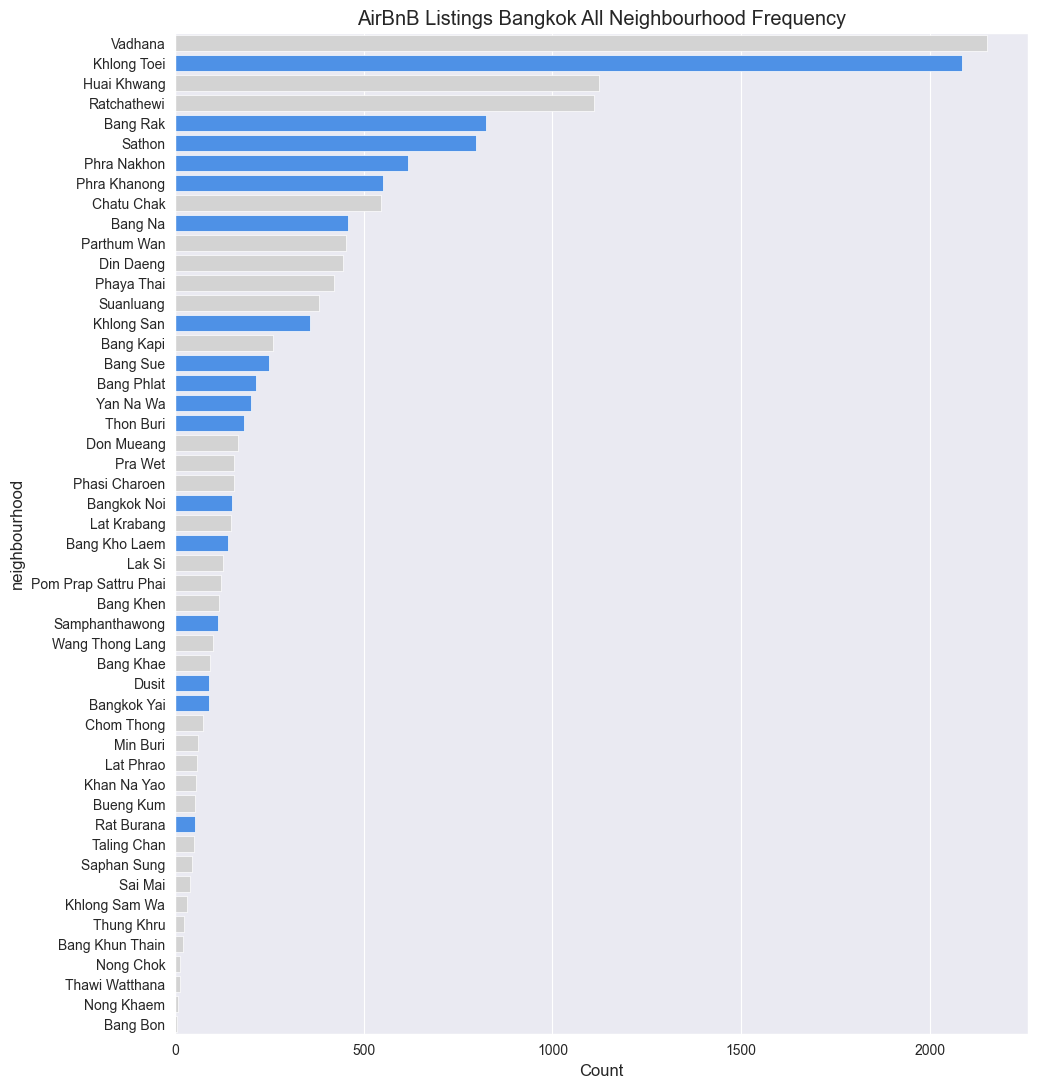

In [940]:
# Using barplot to show the neighbourhoods frequency sorted by the largest one

result = airbnb_cleaned['neighbourhood'].value_counts().reset_index()

plt.figure(figsize = (11, 13))
plt.title('AirBnB Listings Bangkok All Neighbourhood Frequency')
sns.barplot(
    airbnb_cleaned['neighbourhood'],
    errorbar = None,
    order = result['neighbourhood'],
    estimator='count',
    palette = ['#358EFF' if x in neighbour_chao_phraya_list else 'lightgray' for x in result['neighbourhood']],
    # hue='neighbourhood',
    legend=False
    )
plt.xlabel('Count');

From the bar chart above we see that there are 6 neighbourhoods alongside Chao Phraya river which reside on the Top 10 of most Listings Frequency

## Neighbourhood Frequency Alongside Chao Phraya and The Rest Location

https://lazudi.com/th-en/blog/a-guide-to-living-on-the-chao-phraya-river-bangkok <br>
https://fullsuitcase.com/bangkok-neighborhoods-where-to-stay/ <br>
https://www.nationalgeographic.com/travel/article/bangkok-rediscovers-the-magic-of-its-legendary-river

In [943]:
airbnb_cleaned.chao_phraya_pos.value_counts()

chao_phraya_pos
NOT Alongside                  8623
Alongside Chao Phraya River    7173
Name: count, dtype: int64

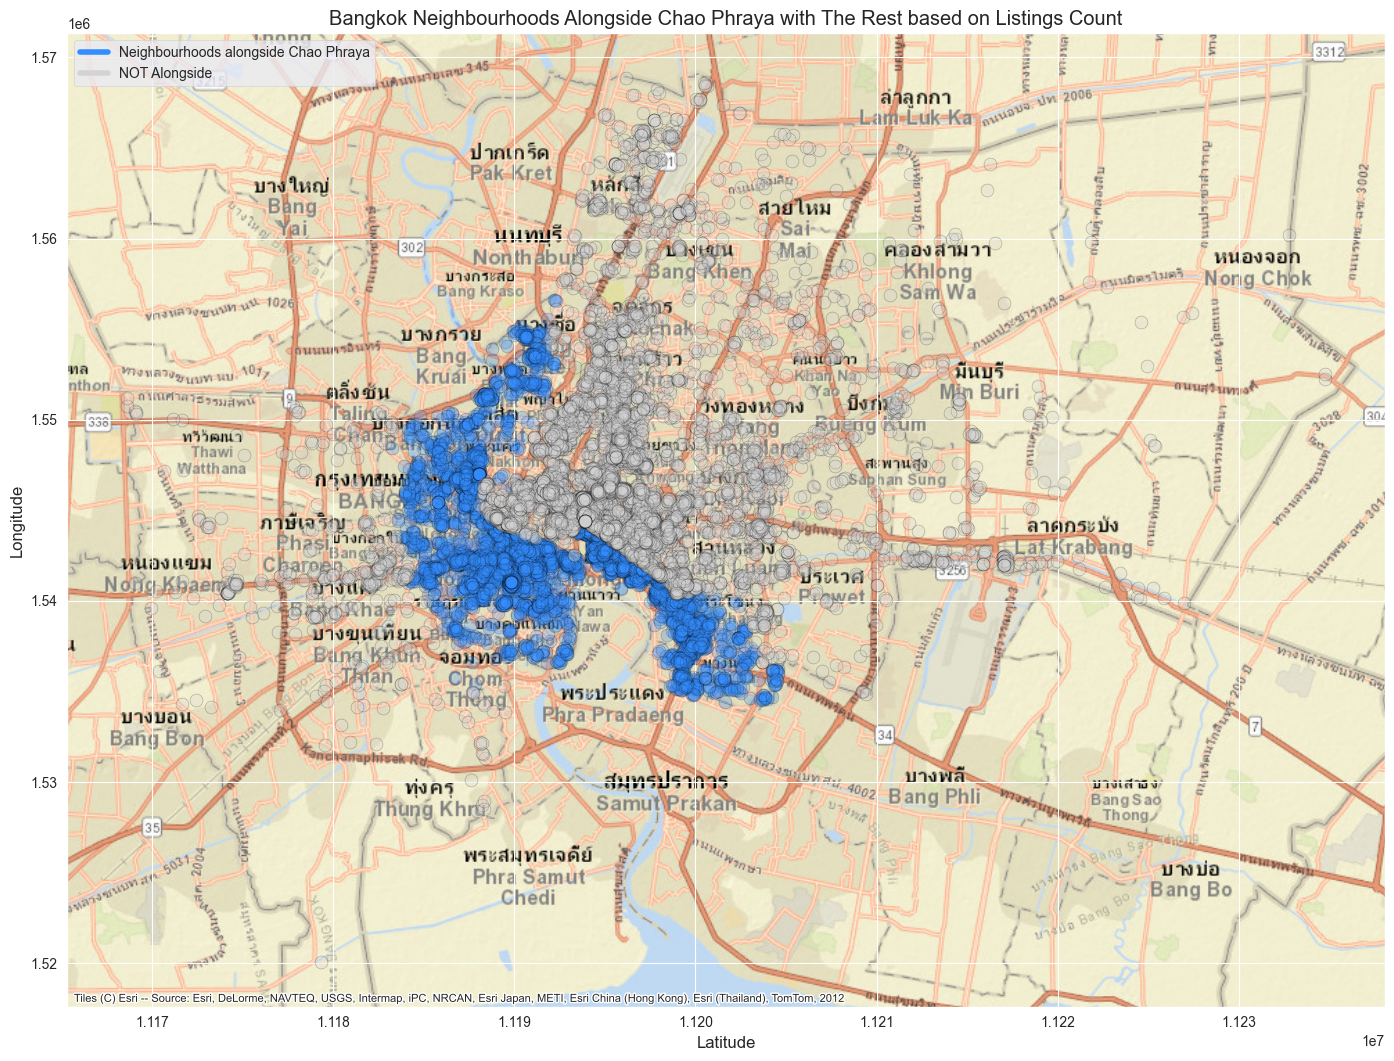

In [945]:
filtered_nghb = airbnb_cleaned[airbnb_cleaned['chao_phraya_pos'] != 'NOT Alongside'].reset_index(drop=True)
filtered_nghb2 = airbnb_cleaned[airbnb_cleaned['chao_phraya_pos'] == 'NOT Alongside'].reset_index(drop=True)

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(filtered_nghb['longitude'], filtered_nghb['latitude'])]
gdf = gpd.GeoDataFrame(filtered_nghb[['neighbourhood', 'latitude', 'longitude']], crs="EPSG:4326", geometry=geometry) # WGS 84 CRS

# Create a GeoDataFrame
geometry2 = [Point(xy) for xy in zip(filtered_nghb2['longitude'], filtered_nghb2['latitude'])]
gdf2 = gpd.GeoDataFrame(filtered_nghb2[['neighbourhood', 'latitude', 'longitude']], crs="EPSG:4326", geometry=geometry2) # WGS 84 CRS

# Define a color map for the markers
# color_map = {
#     'Vadhana': 'purple',
#     'Khlong Toei': 'green',
#     'Huai Khwang': 'blue',
#     'Ratchathewi': 'red',
#     'Bang Rak': 'orange',
#     'Sathon': 'gold'
# }

color_map = dict()

for k in airbnb_cleaned['neighbourhood'].unique():
    cek_along_pos = airbnb_cleaned[airbnb_cleaned['neighbourhood'] == k]['chao_phraya_pos'].iloc[0]
    if cek_along_pos == 'NOT Alongside':
        color_map[k] = 'lightgray'
    else:
        color_map[k] = '#358EFF'

custom_lines = [Line2D([0], [0], color='#358EFF', lw=4),
                Line2D([0], [0], color='lightgray', lw=4)]

# custom_lines.extend([Line2D([0], [0], color='orange', lw=4)] * (len(color_map) - 5))

# Map the colors to the data
# gdf['color'] = gdf['neighbourhood'].map(color_map)

# Set CRS to EPSG:3857 for compatibility with contextily basemaps
gdf = gdf.to_crs(epsg=3857)
gdf2 = gdf2.to_crs(epsg=3857)

# Plot the base map with contextily
fig, ax = plt.subplots(figsize=(17, 13))
# gdf.plot(ax=ax, color=gdf['color'], markersize=85, alpha=0.25, edgecolor='k')
gdf.plot(ax=ax, c='#358EFF', markersize=85, alpha=0.25, edgecolor='k')
gdf2.plot(ax=ax, c='lightgray', markersize=85, alpha=0.25, edgecolor='k')

# # Add labels for each neighborhood
# for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['neighbourhood']):
#     ax.text(x, y, label, fontsize=12, ha='right')

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldStreetMap)

# # Get the current extent
# xmin, xmax, ymin, ymax = gdf.total_bounds
# # print(xmin, xmax, ymin, ymax)
# # Set new extent to zoom out (adjusting by a factor, e.g., 1.5)
# scale_num = 2

# ax.set_xlim(xmin - scale_num, xmax + scale_num)
# ax.set_ylim(ymin - scale_num, ymax + scale_num)

# Set titles and labels
ax.set_title('Bangkok Neighbourhoods Alongside Chao Phraya with The Rest based on Listings Count')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.legend(custom_lines, ['Neighbourhoods alongside Chao Phraya', 'NOT Alongside'], loc="upper left")
# ax.legend(loc="upper left")
# ax.set_axis_off()

# Show the plot
plt.show()

This chart show where is the location of Neighbourhoods that alongside the Chao Phraya river (highlighted).

## Total Listings of Each Location Chao Phraya River based on room_type

''

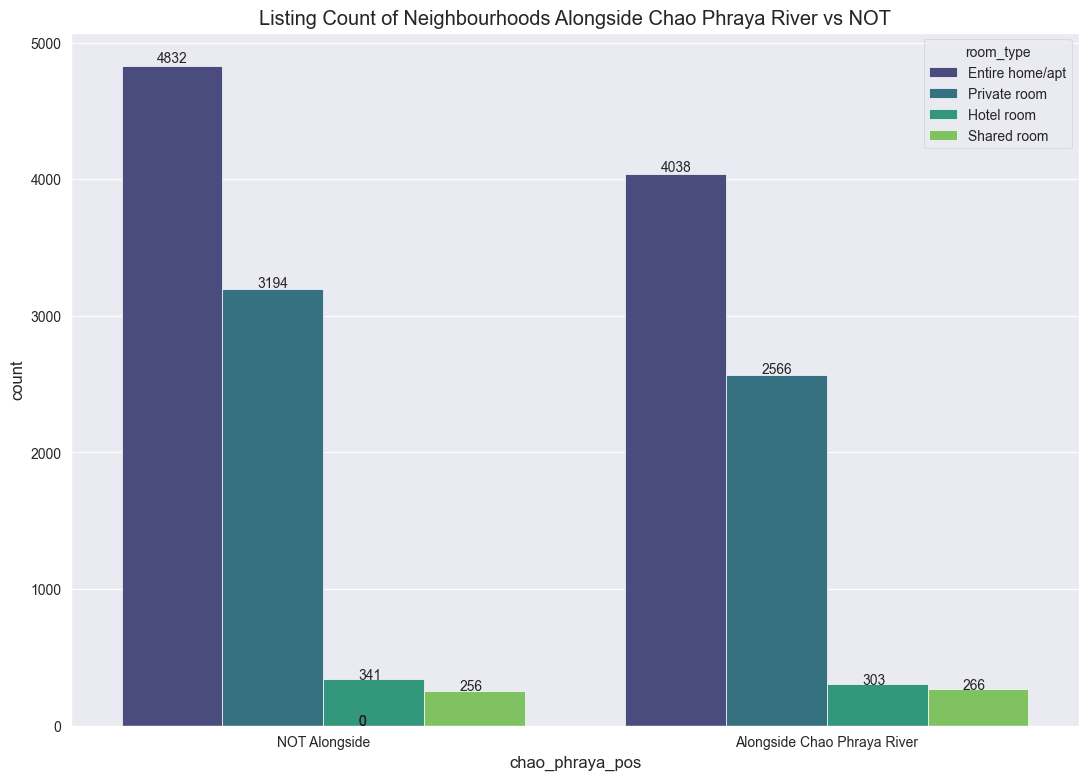

In [967]:
plt.figure(figsize=(13,9))
plt.title('Listing Count of Neighbourhoods Alongside Chao Phraya River vs NOT')
ax = sns.countplot(
    x='chao_phraya_pos',
    data=airbnb_cleaned, 
    palette='viridis',
    hue='room_type',
    stat='count'
)

# use to show label of count value
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.07, p.get_height() * 1.005));
;

## Mean of Price Comparison for Listings on Neighbourhoods Alongside Chao Phraya River and The Rest (NOT Alongside) based on room_type

''

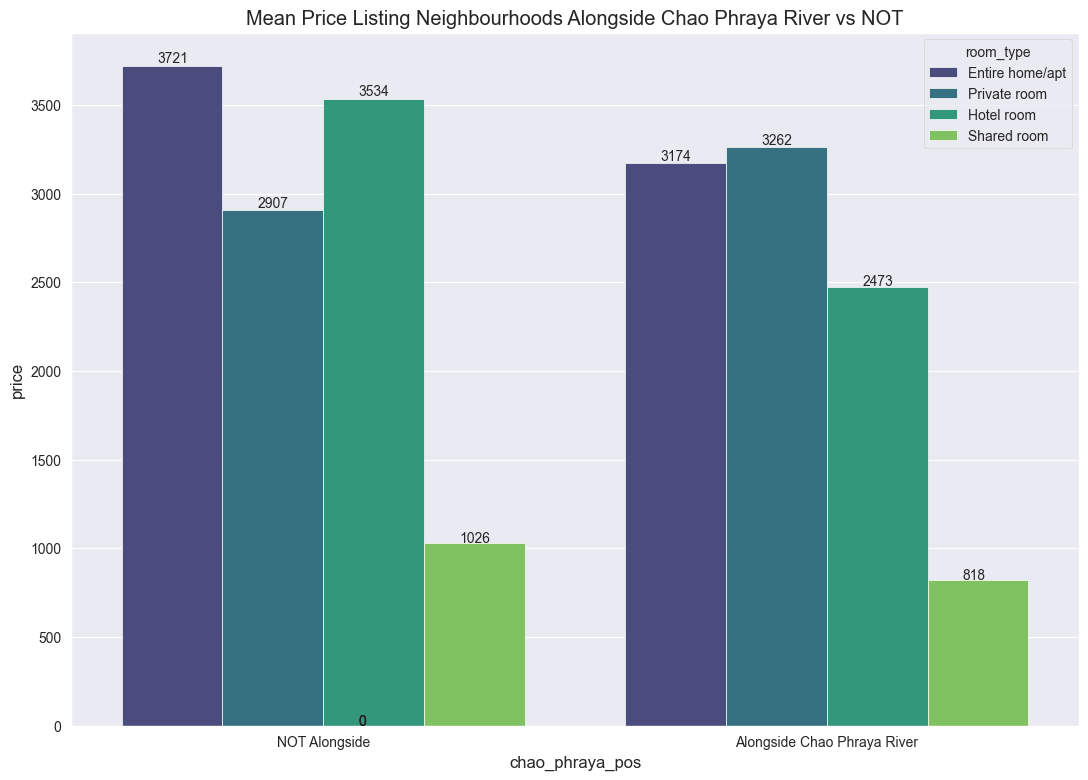

In [964]:
cps_bar = airbnb_cleaned.groupby('chao_phraya_pos')['price'].mean().reset_index()

plt.figure(figsize=(13,9))
plt.title('Mean Price Listing Neighbourhoods Alongside Chao Phraya River vs NOT')
ax = sns.barplot(
    x='chao_phraya_pos',
    y='price', 
    data=airbnb_cleaned, 
    palette='viridis',
    hue='room_type',
    errorbar=None,
    estimator='mean'
)

# use to show the label of mean value
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.07, p.get_height() * 1.005));
;

## Mean of minimum_nights Comparison for Listings on Neighbourhoods Alongside Chao Phraya River and The Rest (NOT Alongside)

In [911]:
cps_bar

chao_phraya_pos  minimum_nights
0  Alongside Chao Phraya River       15.825457
1                NOT Alongside       14.908037

''

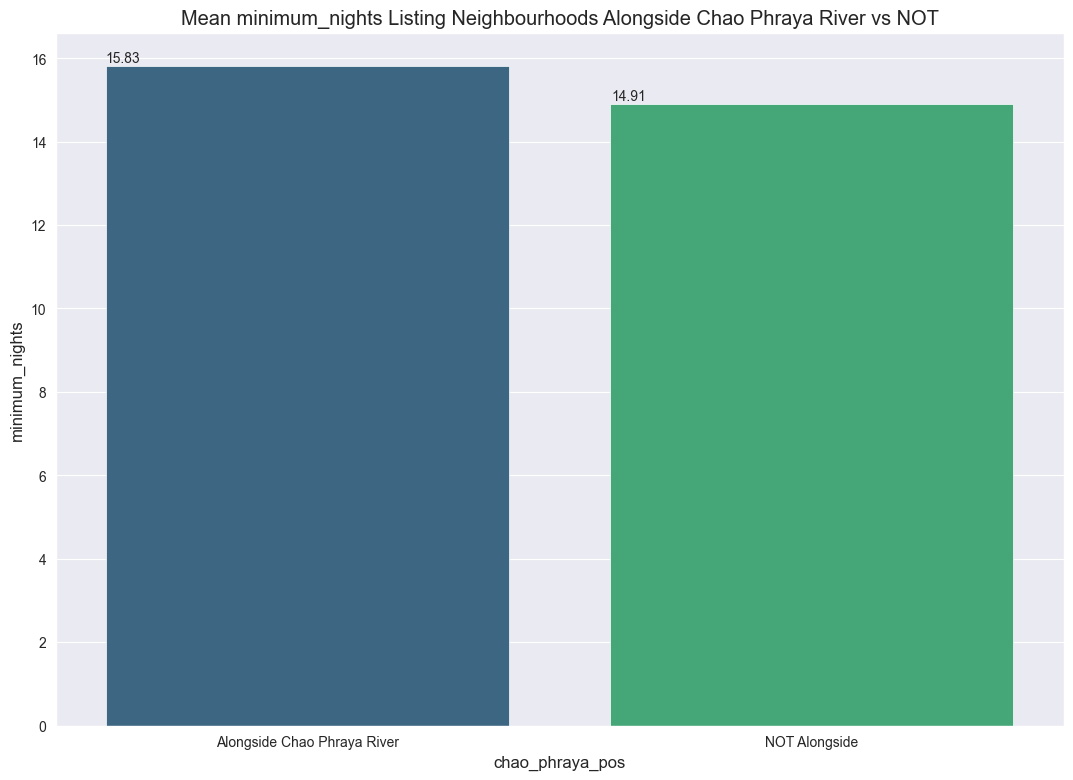

In [917]:
cps_bar = airbnb_cleaned.groupby('chao_phraya_pos')['minimum_nights'].mean().reset_index()

plt.figure(figsize=(13,9))
plt.title('Mean minimum_nights Listing Neighbourhoods Alongside Chao Phraya River vs NOT')
ax = sns.barplot(
    x='chao_phraya_pos',
    y='minimum_nights', 
    data=cps_bar, 
    palette='viridis',
    hue='chao_phraya_pos',
    legend=False
)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005));
;

## Room Type Frequency

''

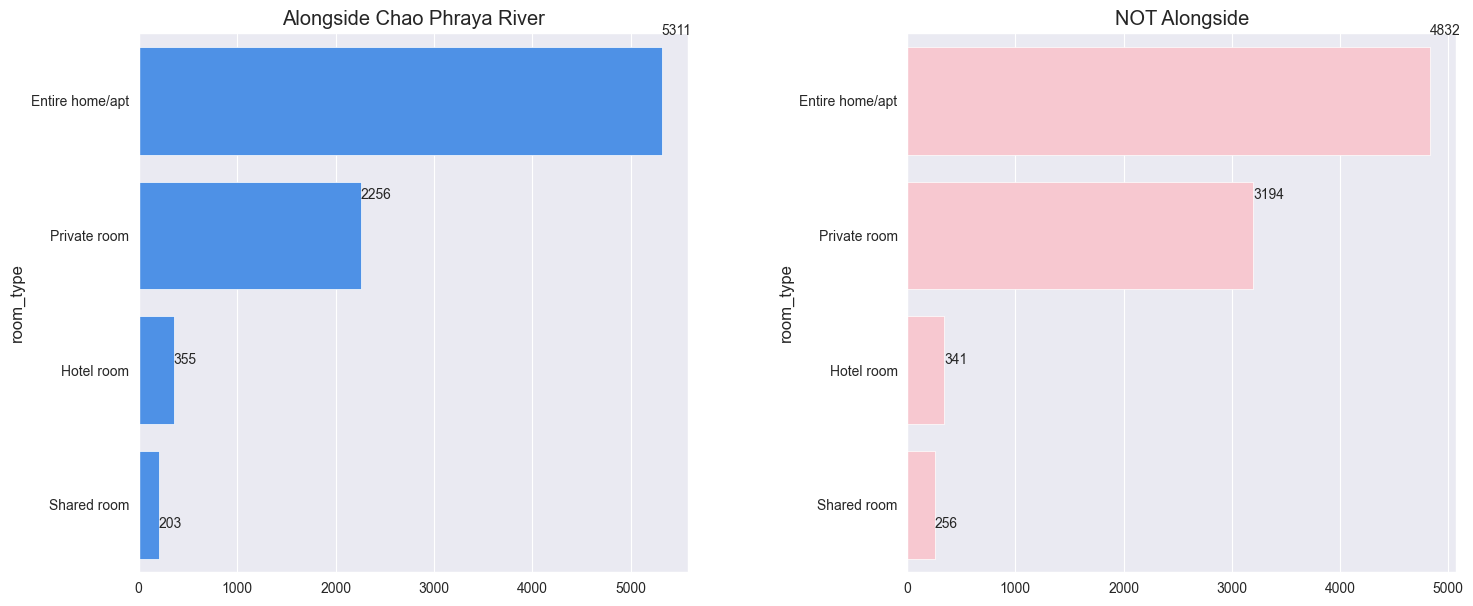

In [872]:
result = filtered_nghb['room_type'].value_counts().reset_index()
result2 = filtered_nghb2['room_type'].value_counts().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(17, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# plt.figure(figsize = (7, 11))
ax1 = sns.barplot(
    filtered_nghb['room_type'],
    errorbar = None,
    order = result['room_type'],
    estimator='count',
    color='#358EFF',
    ax=axes[0]
)

axes[0].set_title('Alongside Chao Phraya River')

for p in ax1.patches:
    ax1.annotate(str(int(p.get_width())), (p.get_width()* 1.0005, p.get_y() * 1.22));
    
ax2 = sns.barplot(
    filtered_nghb2['room_type'],
    errorbar = None,
    order = result2['room_type'],
    estimator='count',
    color='pink',
    ax=axes[1]
)

axes[1].set_title('NOT Alongside')

for p in ax2.patches:
    ax2.annotate(str(int(p.get_width())), (p.get_width()* 1.0005, p.get_y() * 1.22));
;

## Room Type Spread Location

In [874]:
filtered_nghb

id                                               name  \
0                  27934                    Nice room with superb city view   
1                  55681                      Sathorn Terrace Apartment(61)   
2                  55686       Comfy bedroom near River pier & BTS  Taksin.   
3                 959254                 Deluxe Condo, Nana, Pool/GYM/Sauna   
4                1791481                Nice and Quiet condo near BTS Onnut   
...                  ...                                                ...   
8120  790460476887978054  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
8121  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
8122  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
8123  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
8124  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

        host_id  host_name neighbourhood   latitude   longitude  \
0        120437     Nuttee   Ratchathewi  13.759830  100.541340   
1        263049        Tor      Bang Rak  13.719340  100.517600   
2        263049        Tor        Sathon  13.718020  100.515390   
3       5153476     Natcha   Khlong Toei  13.715160  100.568060   
4       9399478   Piyakorn   Khlong Toei  13.707190  100.599360   
...         ...        ...           ...        ...         ...   
8120  491526222  Phakhamon   Ratchathewi  13.752904  100.540381   
8121  491526222  Phakhamon   Ratchathewi  13.753052  100.538738   
8122  491526222  Phakhamon   Ratchathewi  13.753169  100.538700   
8123  491526222  Phakhamon   Ratchathewi  13.754789  100.538757   
8124  491526222  Phakhamon   Ratchathewi  13.752960  100.540820   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt   1905               3                 65  2020-01-06   
1        Private room   1150               2                 27  2019-01-03   
2          Hotel room   1862               2                208  2019-12-02   
3     Entire home/apt   1400              30                  0         NaN   
4     Entire home/apt   1577              30                 78  2019-05-31   
...               ...    ...             ...                ...         ...   
8120     Private room   1400               1                  0         NaN   
8121     Private room   1429               1                  0         NaN   
8122     Private room   1214               1                  0         NaN   
8123     Private room   1214               1                  0         NaN   
8124     Private room   1214               1                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  \
0                  0.50                               2               353   
1                  0.19                               7               320   
2                  1.44                               7               361   
3                   NaN                               1               365   
4                  0.78                               1               330   
...                 ...                             ...               ...   
8120                NaN                              14               357   
8121                NaN                              14               365   
8122                NaN                              14               365   
8123                NaN                              14               365   
8124                NaN                              14               365   

      number_of_reviews_ltm  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
8120                      0  
8121                      0  
8122                      0  
8123                      0  
8124                      0  

[8125 rows x 16 columns]

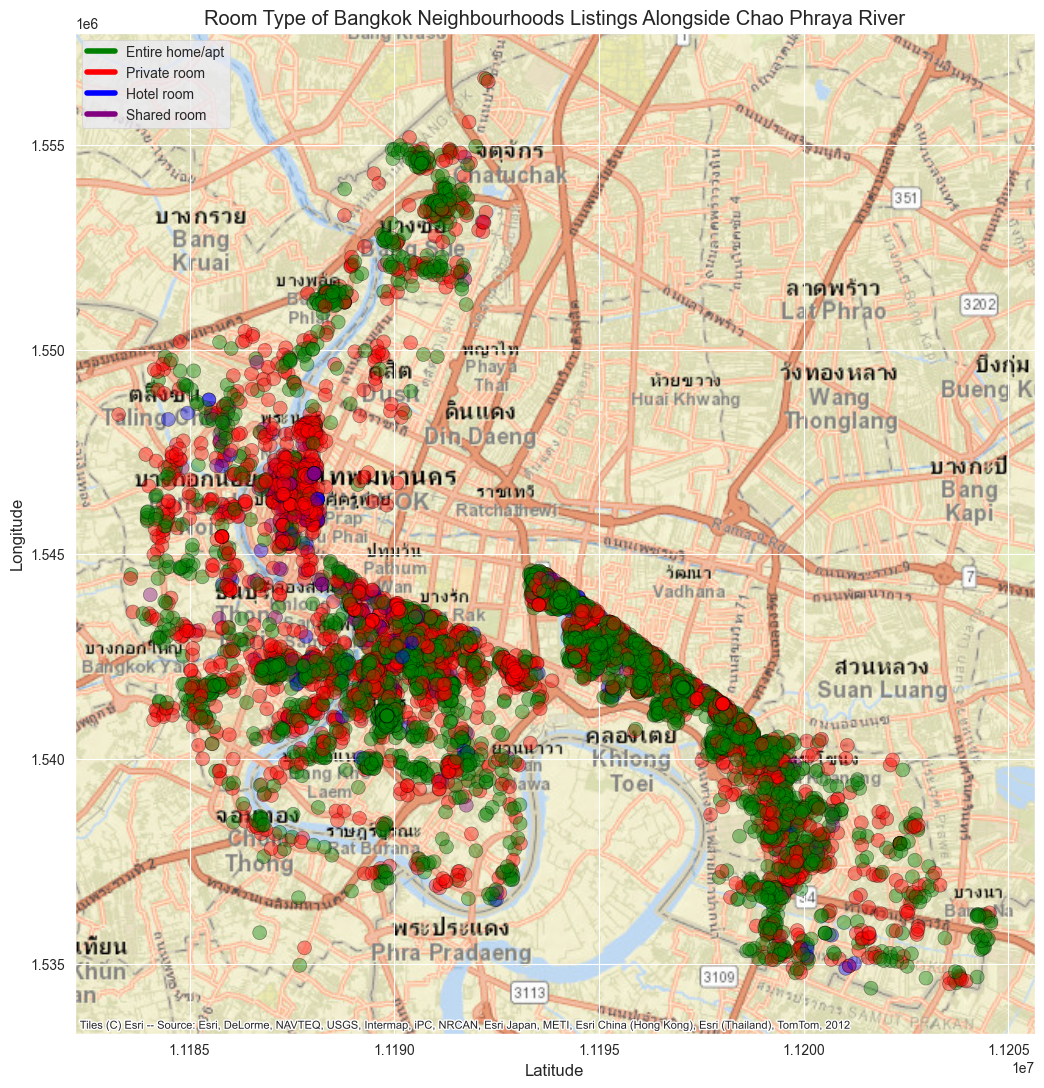

In [876]:
# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(filtered_nghb['longitude'], filtered_nghb['latitude'])]
gdf = gpd.GeoDataFrame(filtered_nghb[['neighbourhood', 'room_type', 'latitude', 'longitude']], crs="EPSG:4326", geometry=geometry) # WGS 84 CRS

# Define a color map for the markers
color_map = {
    'Entire home/apt': 'green',
    'Private room': 'red',
    'Hotel room': 'blue',
    'Shared room': 'purple',
}

custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='purple', lw=4)]

# Map the colors to the data
gdf['color'] = gdf['room_type'].map(color_map)

# Set CRS to EPSG:3857 for compatibility with contextily basemaps
gdf = gdf.to_crs(epsg=3857)

# Plot the base map with contextily
fig, ax = plt.subplots(figsize=(17, 13))
gdf.plot(ax=ax, color=gdf['color'], markersize=100, alpha=0.4, edgecolor='k')

# # Add labels for each neighborhood
# for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['neighbourhood']):
#     ax.text(x, y, label, fontsize=12, ha='right')

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldStreetMap)

# # Get the current extent
# xmin, xmax, ymin, ymax = gdf.total_bounds
# # print(xmin, xmax, ymin, ymax)
# # Set new extent to zoom out (adjusting by a factor, e.g., 1.5)
# scale_num = 2

# ax.set_xlim(xmin - scale_num, xmax + scale_num)
# ax.set_ylim(ymin - scale_num, ymax + scale_num)

# Set titles and labels
ax.set_title('Room Type of Bangkok Neighbourhoods Listings Alongside Chao Phraya River')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.legend(custom_lines, color_map.keys(), loc="upper left")

# Show the plot
plt.show()

# 5. Summary

By looking at the results of the existing analysis, although the area around the Chao Phraya river is only 17 out of a total of 50 areas, it has a value that almost matches the remaining areas if they are separated. Given the strategic location, especially in terms of direct and indirect access by transportation to several landmarks, increasing the number of new listings could be more focused on this area. That way it is calculated that the increase in the number of registered listings can even reach 20% annually. For additional action to take into account proximity to these landmarks, this can also be accompanied by not only a large division of the area along the Chao Phraya River and not, but can be subdivided into additional related categories.

# Tableau Dashboard

---

<center><p font-size: 12px;> Thank You </p></center>

---